## Time Series

In [34]:
#!pip install investpy

In [3]:
from investpy import get_stock_recent_data, get_stock_historical_data
from datetime import date, timedelta

In [4]:
data_inicio = format(date.today() - timedelta(365), "%d/%m/%Y")
data_fim = format(date.today() - timedelta(1), "%d/%m/%Y")
data_inicio, data_fim

('27/08/2021', '26/08/2022')

In [5]:
petr4 = get_stock_historical_data('petr4', 'brazil', data_inicio, data_fim )['Close']
petr4.head()

Date
2021-08-27    28.49
2021-08-30    28.30
2021-08-31    27.19
2021-09-01    27.04
2021-09-02    26.60
Name: Close, dtype: float64

In [6]:
petr4.tail()

Date
2022-08-22    32.41
2022-08-23    33.44
2022-08-24    33.64
2022-08-25    33.28
2022-08-26    33.64
Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

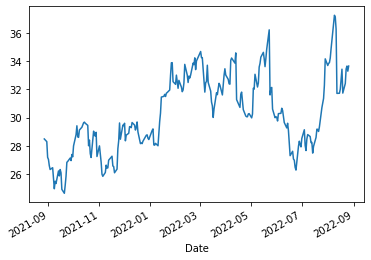

In [7]:
petr4.plot()

## Autoccorelation and partial autocorrelation functions (ACF e PACF)

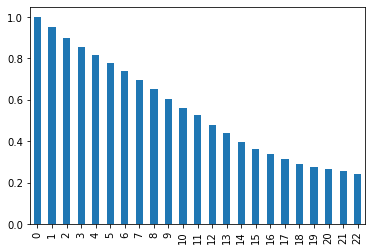

In [11]:
import statsmodels.api as sm
pd.Series(sm.tsa.acf(petr4, nlags=22)).plot(kind='bar');

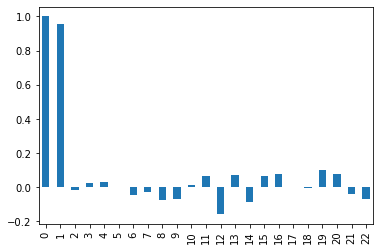

In [12]:
pd.Series(sm.tsa.pacf(petr4, nlags=22)).plot(kind='bar');

## Unit root tests

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
_, p, _, _, _, _ = adfuller(petr4)
p

0.1684073922247915

In [15]:
y = petr4.reset_index()['Close']
y

0      28.49
1      28.30
2      27.19
3      27.04
4      26.60
       ...  
245    32.41
246    33.44
247    33.64
248    33.28
249    33.64
Name: Close, Length: 250, dtype: float64

In [16]:
adfuller(petr4)

(-2.3111175974677045,
 0.1684073922247915,
 0,
 249,
 {'1%': -3.4568881317725864,
  '5%': -2.8732185133016057,
  '10%': -2.5729936189738876},
 571.8794148297666)

## AR, MA, ARMA e ARIMA

In [17]:
arima = sm.tsa.arima.ARIMA(y, order=(1, 0, 0), trend=[0, 1,1]).fit()
print(arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -329.965
Date:                Sat, 27 Aug 2022   AIC                            667.929
Time:                        16:06:33   BIC                            682.015
Sample:                             0   HQIC                           673.598
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3978      0.066      6.008      0.000       0.268       0.528
x2            -0.0011      0.000     -4.010      0.000      -0.002      -0.001
ar.L1          0.9779      0.002    542.140      0.0

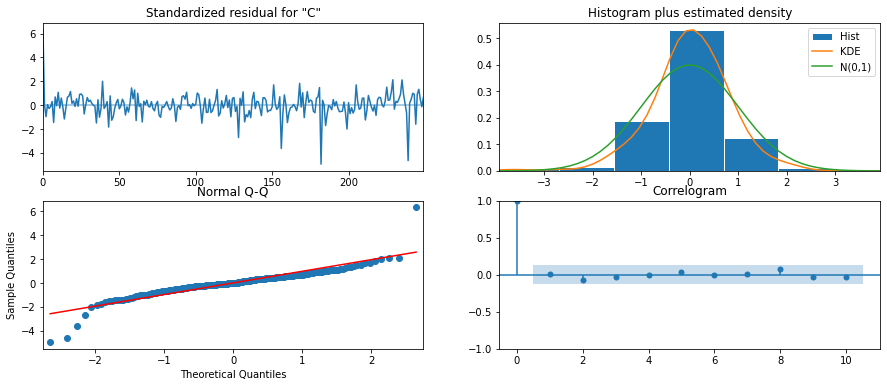

In [18]:
arima.plot_diagnostics(figsize=(15,6),lags=10);

In [19]:
arima.resid

0      28.093356
1       0.035120
2      -0.895540
3       0.033560
4      -0.266119
         ...    
245     0.854442
246     1.224956
247     0.423237
248    -0.126736
249     0.590991
Length: 250, dtype: float64

In [20]:
arima.forecast(steps=10)

250    33.395356
251    33.150342
252    32.904919
253    32.659047
254    32.412685
255    32.165796
256    31.918342
257    31.670287
258    31.421594
259    31.172229
Name: predicted_mean, dtype: float64

## Auto ARMA

Python has an auto ARMA (note: ARMA, not ARIMA) functionality that seeks the best ARMA(p,q) model to fit a data. 

(In ML language, it does hyperparameter tuning on the (p,q)-hyperspace).

This function, however, _only works for stationary series_, which is not our case. So we'll get a bogus result and a warning. But let's do it anyway, just to show the function in action.

In [21]:
from statsmodels.tsa.stattools import arma_order_select_ic
auto_arma = arma_order_select_ic(y, max_ar=4, max_ma=2, ic=['aic','bic'])

C:\Users\felbu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\felbu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\felbu\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\felbu\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
